# 전체 웹툰 댓글 키워드 분석

## 데이터 준비 및 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from multiprocessing import freeze_support
from collections import Counter

In [2]:
data_posi = pd.read_csv('전독시_긍정감성_결과.csv', encoding='utf-8-sig', engine='python')
data_nega = pd.read_csv('전독시_부정감성_결과.csv', encoding='utf-8-sig', engine='python')

In [5]:
# Unnamed: 0  열 제거
del data_posi['Unnamed: 0']
del data_nega['Unnamed: 0']

del data_posi['label']
del data_nega['label']

In [9]:
# 중복된 값 제거
data_posi.drop_duplicates(subset=['comment'], inplace=True)
data_nega.drop_duplicates(subset=['comment'], inplace=True)


In [10]:
# 한글 문자 이외의 문자는 공백으로 변환
import re
data_posi['comment'] = data_posi['comment'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ",x))
data_nega['comment'] = data_nega['comment'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ",x))

In [12]:
# 빈칸을 null값으로 설정
data_posi['comment'].replace(' ', np.nan, inplace=True)
data_nega['comment'].replace(' ', np.nan, inplace=True)

In [16]:
# null값이 존재하는 행 제거
data_posi = data_posi.dropna(how='any')
data_nega = data_nega.dropna(how='any')

## =========================================

## 명사만 추출하기

In [17]:
okt = Okt()

In [19]:
# comment에서 품사 정보를 부착하여 반환 ==> 긍정
pos_comment_pos = []
for comment in data_posi['comment']:
    pos_temp = okt.pos(comment, norm=True, stem=True) #okt의 pos 함수를 이용하여 품사 추출
    pos_comment_pos.append(pos_temp)
    
print(pos_comment_pos[3]) # 출력된 결과에서 Noun이 명사

[('헐다', 'Verb'), ('자세하다', 'Adjective'), ('보', 'Noun'), ('니까', 'Josa'), ('이지혜', 'Noun'), ('울다', 'Verb')]


In [20]:
# comment에서 품사 정보를 부착하여 반환 ==> 부정
pos_comment_neg = []
for comment in data_nega['comment']:
    pos_temp = okt.pos(comment, norm=True, stem=True) #okt의 pos 함수를 이용하여 품사 추출
    pos_comment_neg.append(pos_temp)
    
print(pos_comment_neg[3]) # 출력된 결과에서 Noun이 명사

[('이지혜', 'Noun'), ('우리엄마', 'Noun'), ('이름', 'Noun'), ('인데', 'Josa')]


In [21]:
# 추출된 품사가 있는 리스트에서 명사만 추출해서 리스트로 만들기 == > 긍정
noun_comment_pos = []
for item in pos_comment_pos:
    for word, pos in item:
        if pos == 'Noun': # 추출된 품사 리스트에서 Noun에 해당하는 값만 명사리스트에 저장
            noun_comment_pos.append(word)
            
print(noun_comment_pos[:100])

['도깨비', '얼굴', '생물', '식물', '세균', '포함', '길', '미션', '수', '세균', '감염', '면역체계', '금방', '친구', '쟤', '이지혜', '거', '이름', '오', '대박', '엄마', '나', '친구', '보', '이지혜', '소설', '볼때', '지혜', '이미지', '단발', '생각', '제', '생각', '요', '하나로', '진리', '저', '잼민', '해상', '전신', '감동', '존나', '나', '도깨비', '첫인상', '생각', '함', '다시', '보고', '생각', '기억', '갑', '년', '동안', '소설', '도입', '부분', '기억', '오늘', '차', '지혜', '보고', '다시', '옴', '노스', '역시', '소설', '웹', '보고', '그', '다음', '소설', '최고', '임', '소대장', '통제', '이', '웹툰', '의', '모든', '컷', '떡밥', '라면', '번', '진짜', '모든', '컷', '모든', '장면', '떡밥', '여러분', '대박', '거', '실사', '해상', '제독', '이지혜', '그', '임', '포스터']


In [22]:
# 추출된 품사가 있는 리스트에서 명사만 추출해서 리스트로 만들기 == > 부정
noun_comment_neg = []
for item in pos_comment_neg:
    for word, pos in item:
        if pos == 'Noun': # 추출된 품사 리스트에서 Noun에 해당하는 값만 명사리스트에 저장
            noun_comment_neg.append(word)
            
print(noun_comment_neg[:100])

['그림', '체고', '배틀로얄', '림', '도깨비', '때', '음성', '지원', '누', '이지혜', '우리엄마', '이름', '생명체', '를', '죽', '벌레', '턱', '해', '지혜', '소설', '처', '왜', '고구마', '애초', '저', '상황', '군인', '나발', '누구', '말', '리가', '사실', '서로', '죽', '거', '깨', '비야', '왜', '그림', '작가', '내', '상상', '걸', '벌레', '지하철', '꼬마', '벌레', '바보', '내', '생각', '거', '흠', '그림', '작가', '내', '상상', '그대로', '생명체', '그', '귀뚜라미', '본보기', '애', '무슨', '죄', '이지혜', '얘', '뭔가', '주연', '삘', '스터리', '질질', '남', '주가', '내용', '건', '것', '도안', '독자', '내용', '베댓', '소설', '얘기', '장창', '독자', '십년', '전', '소설', '어캐', '기억', '임', '빆', '기억', '소유자', '은밀', '모략', '전', '장수풍뎅이', '생명체', '거', '벌레']


In [23]:
# 명사 리스트에서 빈도수를 확인해서 탑 30개만 추출 
# 자주 사용하는 명사 중에서 특정 명사 제거하기위한 리스트 == > 긍정
stopwords = ['이제','습습', '니니', '난', '나', '나', '아무', '안', '게', '거', '진짜', '놈', '이', '개','혹시', '저','땜', '왜','좀','뭐','그냥']
count = Counter(noun_comment_pos)
return_contents_pos = []
return_count_pos = []

stop_flag = True
# 빈도수가 가장 높은 30개 추출
for n, c in count.most_common(30):  
    temp = {'tag': n, 'count': c}
    for stopword in stopwords :
        # 불용어가 존재하면 
        if (stopword == n) : 
            stop_flag = False 
            break
    #불용어가 포함되어 있지 않으면
    if (stop_flag == True):
        if len(n) > 1: #글자 수가 1 이상인 명사만 추출
            return_contents_pos.append(n)
            return_count_pos.append(c)
            
    stop_flag =True

print(return_contents_pos)
print(return_count_pos)

['독자', '스포', '소설', '웹툰', '독시', '중혁', '사랑', '사람', '생각', '작가', '보고', '도깨비', '우리', '다음', '성좌']
[8235, 6497, 6401, 4338, 3417, 3266, 3119, 2377, 2247, 2014, 1915, 1679, 1594, 1462, 1401]


In [24]:
# 명사 리스트에서 빈도수를 확인해서 탑 30개만 추출 
# 자주 사용하는 명사 중에서 특정 명사 제거하기위한 리스트 == > 부정
stopwords = ['이제','습습', '니니', '난', '나', '나', '아무', '안', '게', '거', '진짜', '놈', '이', '개','혹시', '저','땜', '왜','좀','뭐','그냥']
count = Counter(noun_comment_neg)
return_contents_neg = []
return_count_neg = []

stop_flag = True
# 빈도수가 가장 높은 30개 추출
for n, c in count.most_common(30):  
    temp = {'tag': n, 'count': c}
    for stopword in stopwords :
        # 불용어가 존재하면 
        if (stopword == n) : 
            stop_flag = False 
            break
    #불용어가 포함되어 있지 않으면
    if (stop_flag == True):
        if len(n) > 1: #글자 수가 1 이상인 명사만 추출
            return_contents_neg.append(n)
            return_count_neg.append(c)
            
    stop_flag =True

print(return_contents_neg)
print(return_count_neg)

['독자', '소설', '중혁', '웹툰', '스포', '작가', '사람', '댓글', '주인공', '독시', '쿠키', '얼굴', '생각', '성좌', '도깨비']
[10954, 6867, 4463, 4450, 3966, 3576, 3212, 2943, 2251, 2150, 2007, 1925, 1913, 1907, 1773]


## ========================================
# 시각화
## 댓글 키워드 빈도수에 따른 막대 그래프

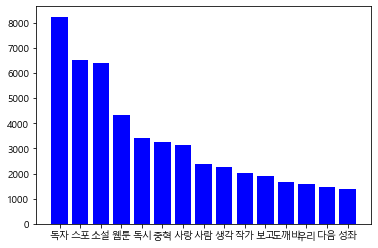

In [26]:
# 키워드 빈도수에 따른 막대 그래프 만들기 == > 긍정
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) #한글 사용을 위해 => 그냥 사용시 한글이 꺠짐

x = np.arange(len(return_contents_pos))

plt.bar(x, return_count_pos, color ='blue', width = 0.8)
plt.xticks(x, return_contents_pos)
plt.show()

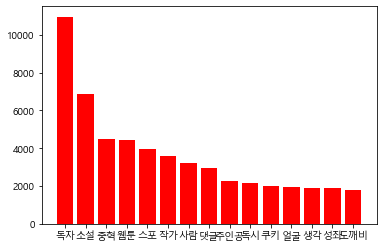

In [27]:
# 키워드 빈도수에 따른 막대 그래프 만들기 == > 부정
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) #한글 사용을 위해 => 그냥 사용시 한글이 꺠짐

x = np.arange(len(return_contents_neg))

plt.bar(x, return_count_neg, color ='red', width = 0.8)
plt.xticks(x, return_contents_neg)
plt.show()

##  댓글 키워드 빈도수에 따른 워드 클라우드

In [54]:
str_noun_words = ','.join(noun_comment)
FONT_PATH = 'C:/Windows/Fonts/malgun.ttf'

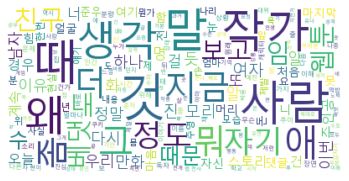

In [55]:
wordcloud = WordCloud(collocation_threshold =30, max_font_size=60, stopwords=stopwords, background_color="white", font_path=FONT_PATH).generate(str_noun_words)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear') # 가장 간단한 방법인 bilinear(Nearest는 화질이 떨어짐)
plt.axis("off")
plt.show()